In [91]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

train_df = pd.read_csv('./titanic_train.csv')
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [92]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

<Axes: >

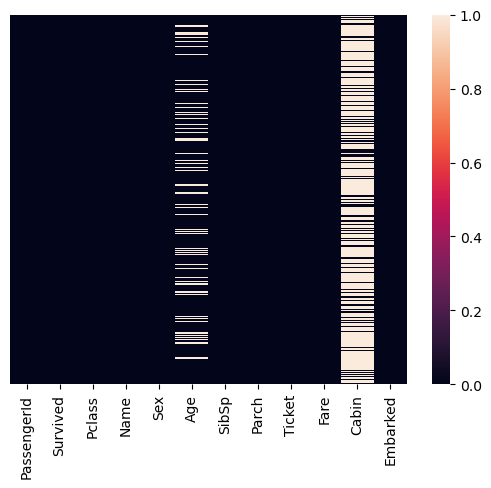

In [93]:
sns.heatmap(train_df.isnull(), yticklabels=False)

<Axes: xlabel='Survived', ylabel='count'>

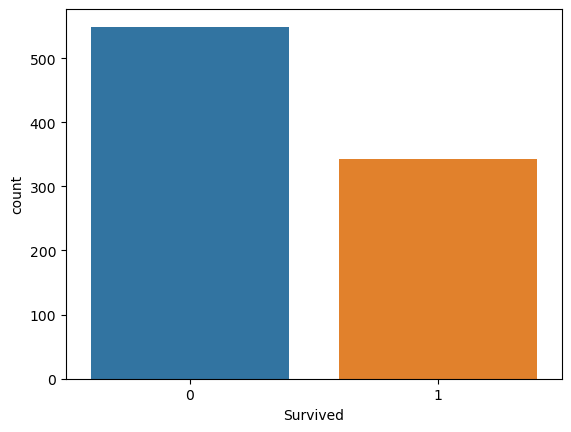

In [94]:
#How much passengers surrvived? (countplot)

# survive_values = train_df['Survived'].value_counts()
# survive_values
sns.countplot(x = 'Survived', data = train_df)

<Axes: xlabel='Survived', ylabel='count'>

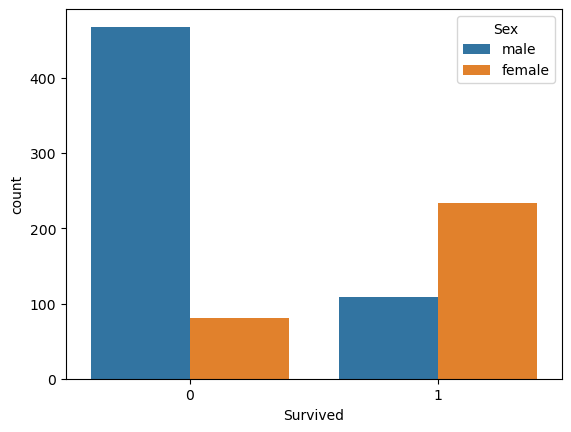

In [95]:
sns.countplot(x = 'Survived', hue='Sex', data = train_df)

AttributeError: 'numpy.int64' object has no attribute 'startswith'

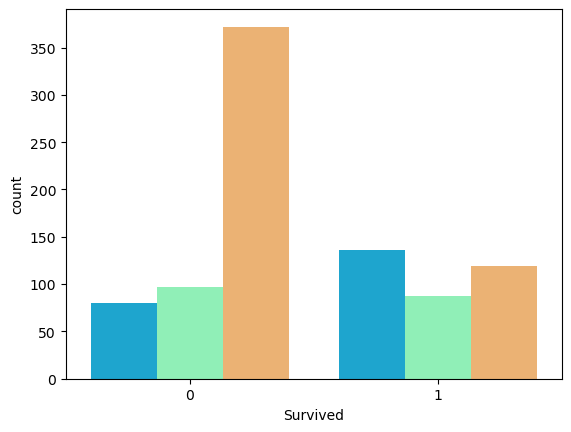

In [24]:
sns.countplot(x = 'Survived', hue='Pclass', data = train_df, palette='rainbow')

C:\Users\Dell\AppData\Local\Temp\ipykernel_10400\2908706788.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df['Age'].dropna(),kde=False,color='darkred',bins=40)


<Axes: xlabel='Age'>

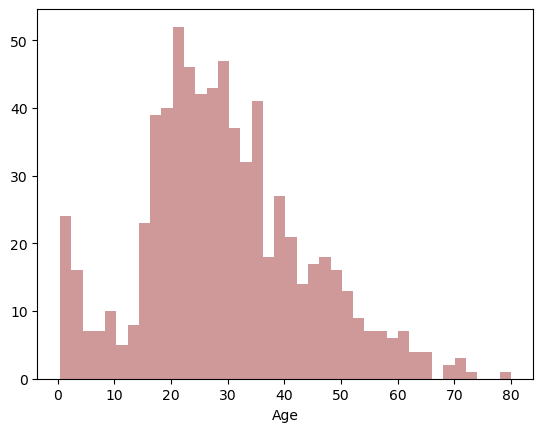

In [96]:
sns.distplot(train_df['Age'].dropna(),kde=False,color='darkred',bins=40)

<Axes: >

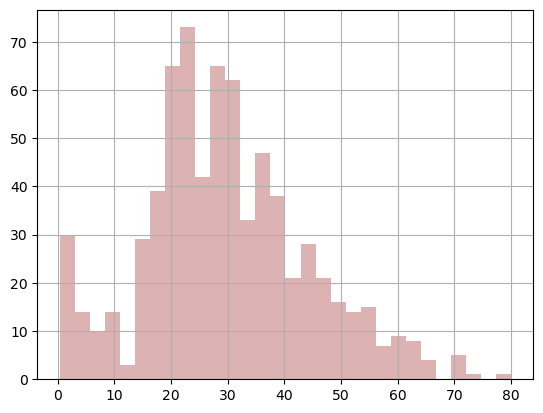

In [97]:
train_df['Age'].hist(bins=30,color='darkred',alpha=0.3)

<Axes: xlabel='SibSp', ylabel='count'>

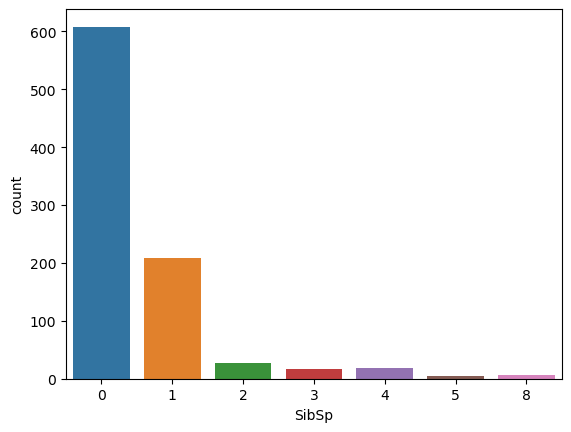

In [98]:
sns.countplot(x='SibSp', data=train_df)

<Axes: >

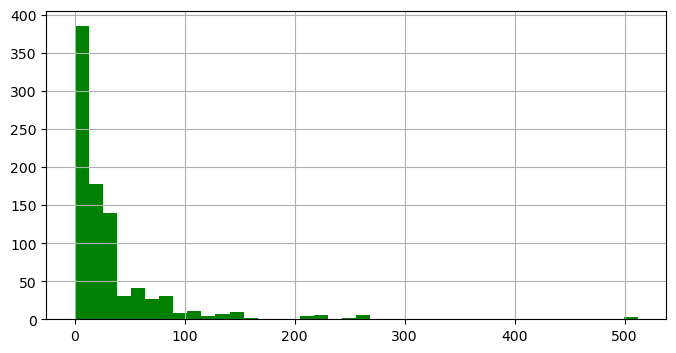

In [99]:
train_df['Fare'].hist(color='green',bins=40,figsize=(8,4))

<Axes: xlabel='Pclass', ylabel='Age'>

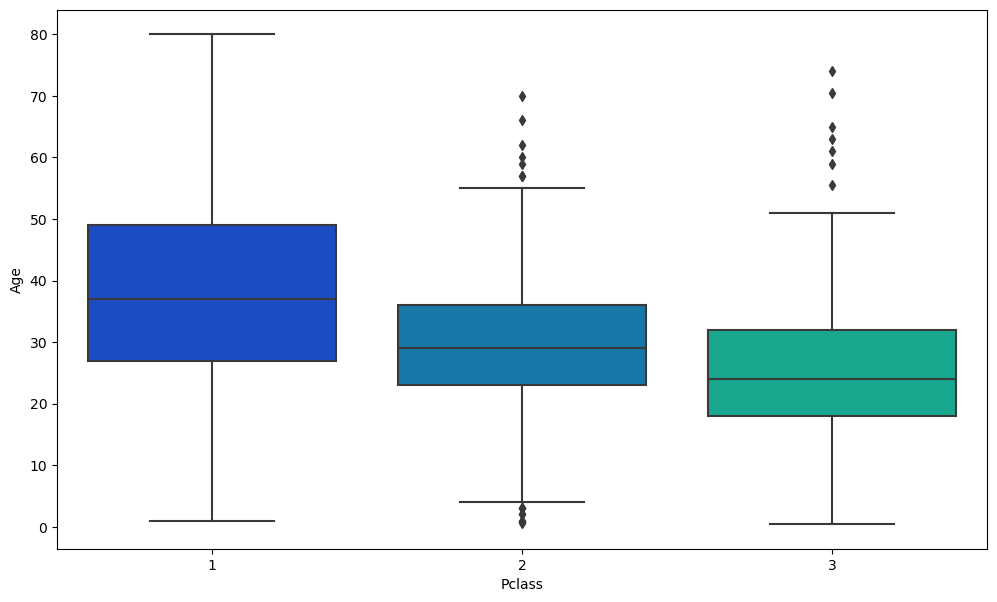

In [100]:
#plotting box plot with passenger class and age as they both are related so that we can fill the missing columns of age instead of dropping them.

plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass', y='Age', data=train_df, palette='winter')

In [101]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[0]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age
        

In [102]:
train_df['Age'] = train_df[['Age', 'Pclass']].apply(impute_age, axis=1)

C:\Users\Dell\AppData\Local\Temp\ipykernel_10400\3945270818.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Age = cols[0]
C:\Users\Dell\AppData\Local\Temp\ipykernel_10400\3945270818.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Pclass = cols[0]


<Axes: >

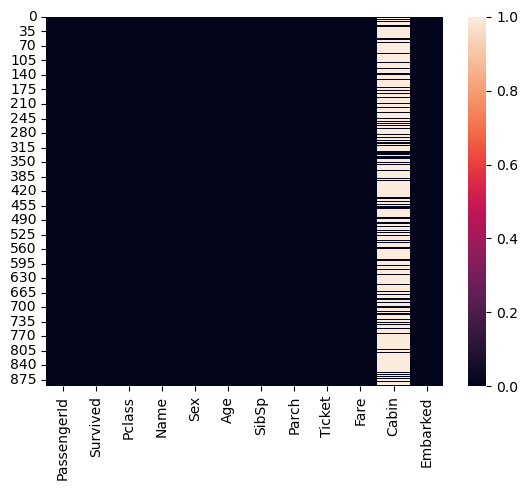

In [103]:
sns.heatmap(train_df.isnull())

In [104]:
train_df.drop('Cabin', axis=1, inplace=True)

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


<Axes: >

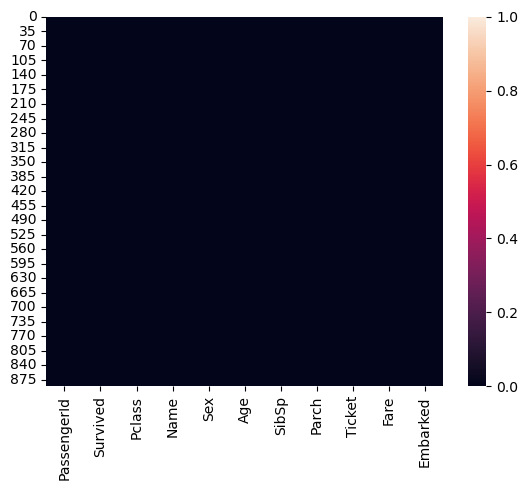

In [105]:
sns.heatmap(train_df.isnull())

In [113]:
embarked_dummies = pd.get_dummies(train_df['Embarked'], drop_first=True).astype(int)

print(embarked_dummies.head())

   Q  S
0  0  1
1  0  0
2  0  1
3  0  1
4  0  1


In [114]:
sex =pd.get_dummies(train_df['Sex'], drop_first=True).astype(int)
sex
embark = pd.get_dummies(train_df['Embarked'], drop_first=True).astype(int)

In [115]:
train_df.drop(['Name', 'Sex', 'Embarked', 'Ticket'], axis=1, inplace=True)

In [116]:
train_df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [117]:
train_df = pd.concat([train_df, sex, embark], axis=1)
train_df

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000,1,0,1
887,888,1,1,19.0,0,0,30.0000,0,0,1
888,889,0,3,24.0,1,2,23.4500,0,0,1
889,890,1,1,26.0,0,0,30.0000,1,0,0


KeyError: "None of [Index(['male', 'Q', 'S'], dtype='object')] are in the [columns]"

NameError: name 'train_df_copy' is not defined